Ejercicio 2

1) - Crea un nuevo fichero y simula el código anterior con una imagen en color y otra en escala de grises.

2) - Guarda tu código en un repositorio gitHub y compártelo a tu profesor.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


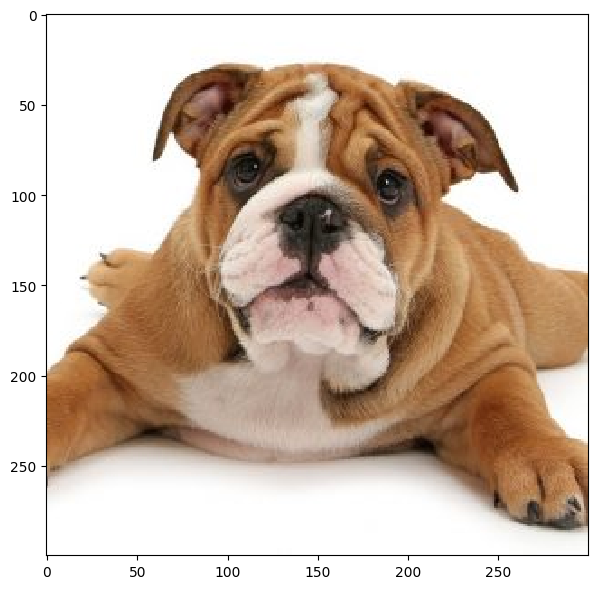

In [25]:


from google.colab import drive
drive.mount('/content/drive')

import skimage as sk # Import skimage as sk
import matplotlib.pyplot as plt # Import matplotlib.pyplot

file_path = '/content/drive/MyDrive/Image processing/dog_image.jpg'
I = sk.io.imread(file_path) # read image using imread function
I.shape

fig = plt.figure(figsize=(10,6))
sk.io.imshow(I) # visualize image using imshow function, corrected variable to I
plt.show() # use plt.show() instead of sk.io.show() from matplotlib.pyplot

In [17]:
IG = sk.color.rgb2gray(I)
IG.shape

(300, 300)

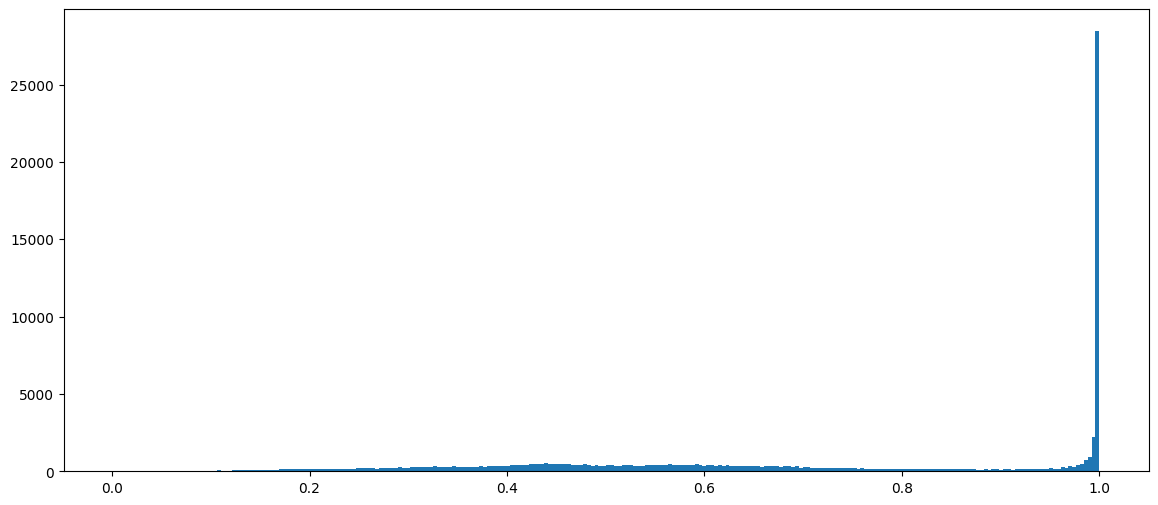

In [7]:
v = IG.reshape(IG.shape[0]*IG.shape[1],1) #conversion de la matrice en un vecteur pr pvoir tracer l'histogramme

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False) #
plt.show()

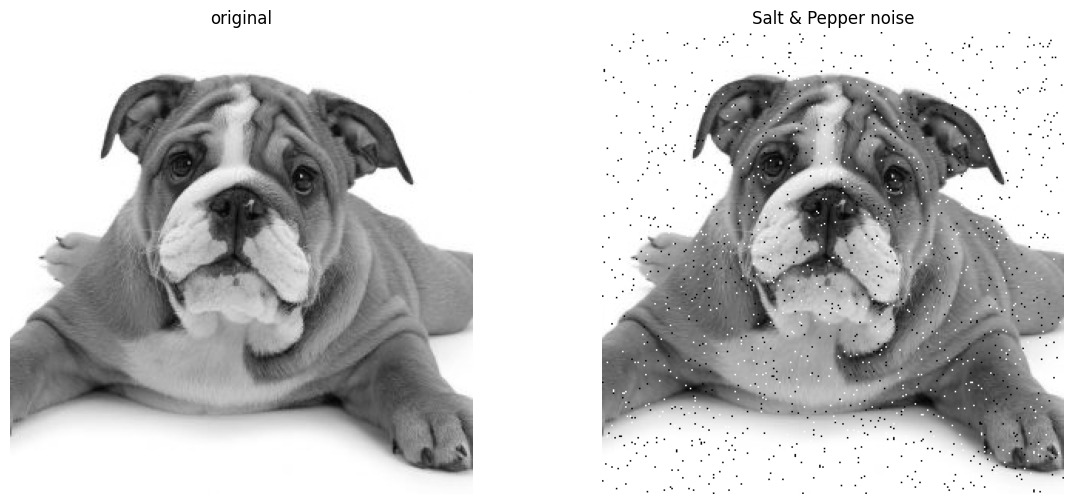

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

img = IG

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(img)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

#différentes techniques pr éliminer le bruit dont Gauss distribution
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')

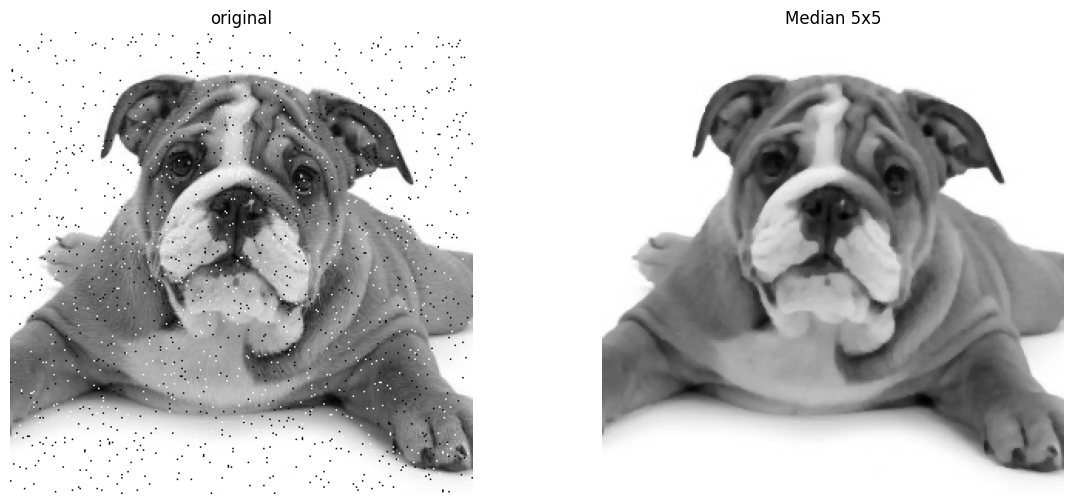

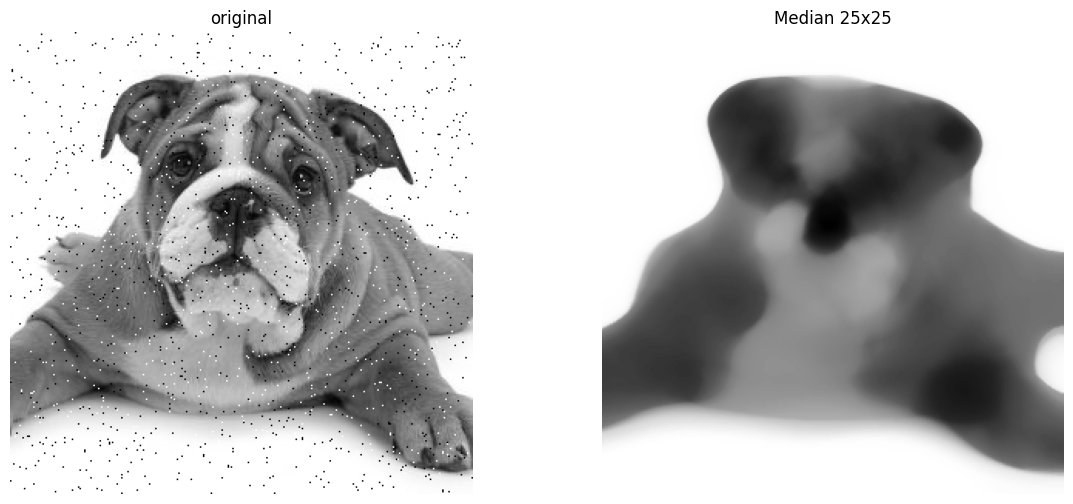

In [20]:
from skimage.morphology import disk
from skimage.filters import median

img = img_as_ubyte(noisy_image)
sel5 = disk(2) # structuring element disk radius 5 pixels
img_med5x5 = median(img, sel5)
plot_comparison(img,img_med5x5,'Median 5x5')
plt.savefig('median.png')

sel25 = disk(25)
img_med25x25 = median(img, sel25)
plot_comparison(img,img_med25x25,'Median 25x25')

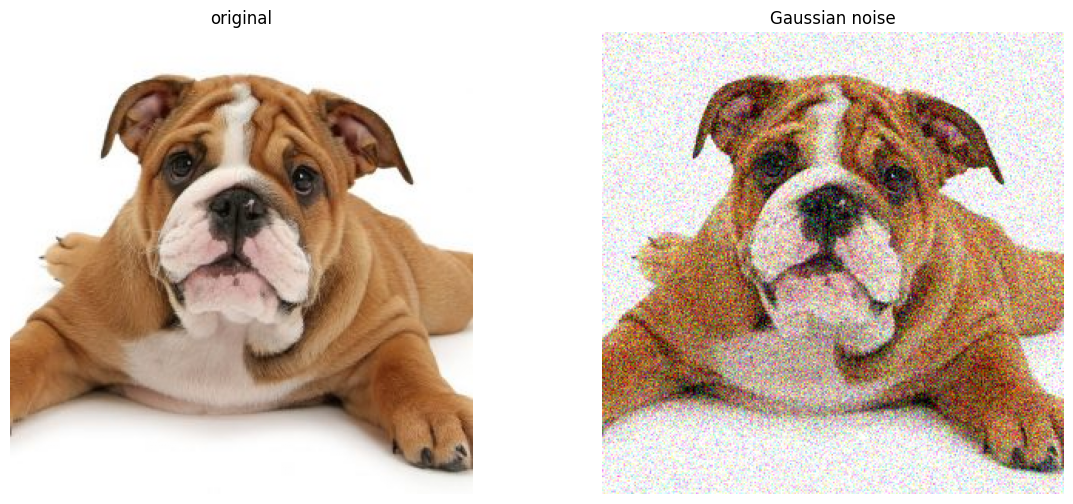

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

from skimage import data, img_as_float
from skimage.util import random_noise


I = img_as_float(I)
sigma = 0.15
noisy_image_normal = random_noise(I, var=sigma**2)

plot_comparison(I,noisy_image_normal,'Gaussian noise')

uint8
0 255


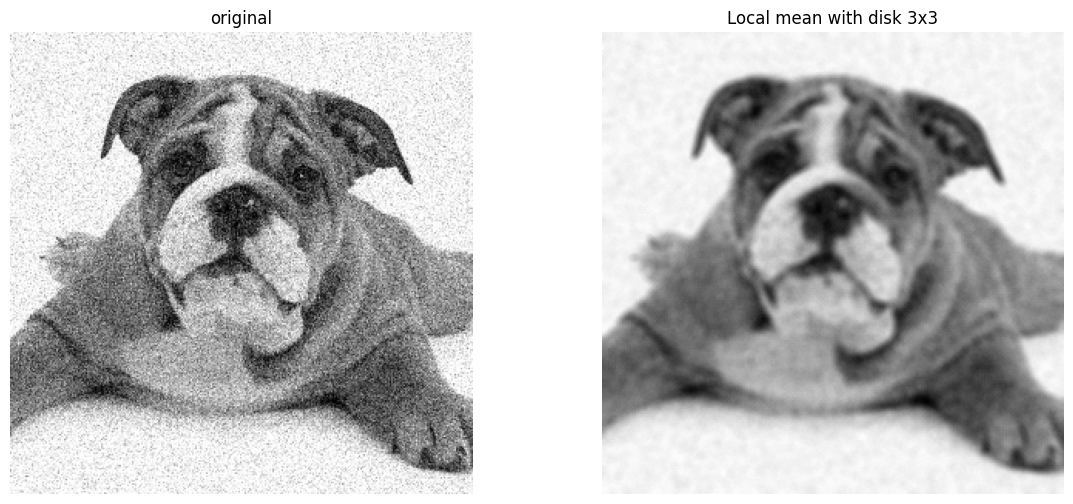

In [27]:
from skimage.filters import rank
from skimage.color import rgb2gray
from skimage.morphology import disk

img = img_as_ubyte(rgb2gray(noisy_image_normal))

# Verificar el formato de la imagen
print(img.dtype)  # Debería ser uint8
print(img.min(), img.max())  # Deberían estar entre 0 y 255


footprint = disk(3) # structuring element
img_locmed = rank.mean(img, footprint=footprint)
plot_comparison(img,img_locmed,'Local mean with disk 3x3')
plt.savefig('Local_mean.png')

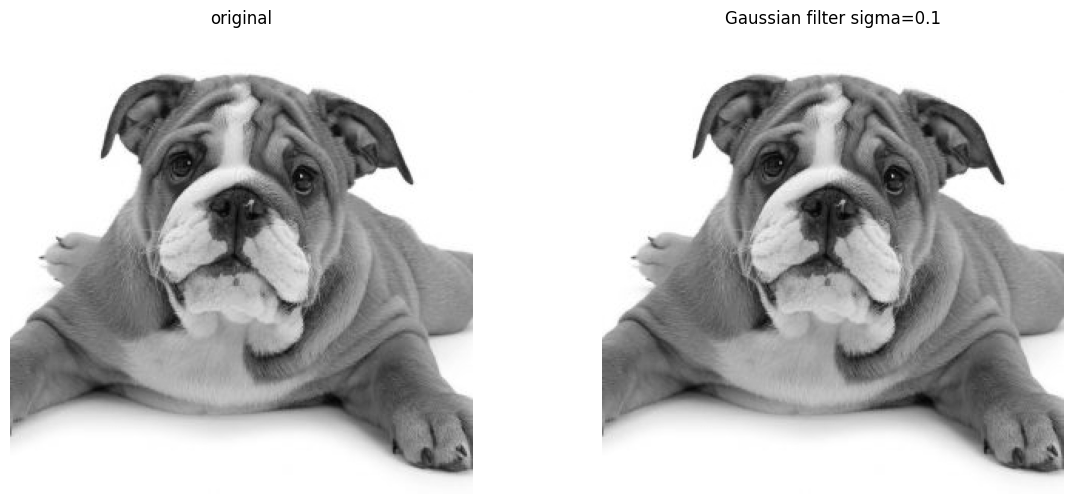

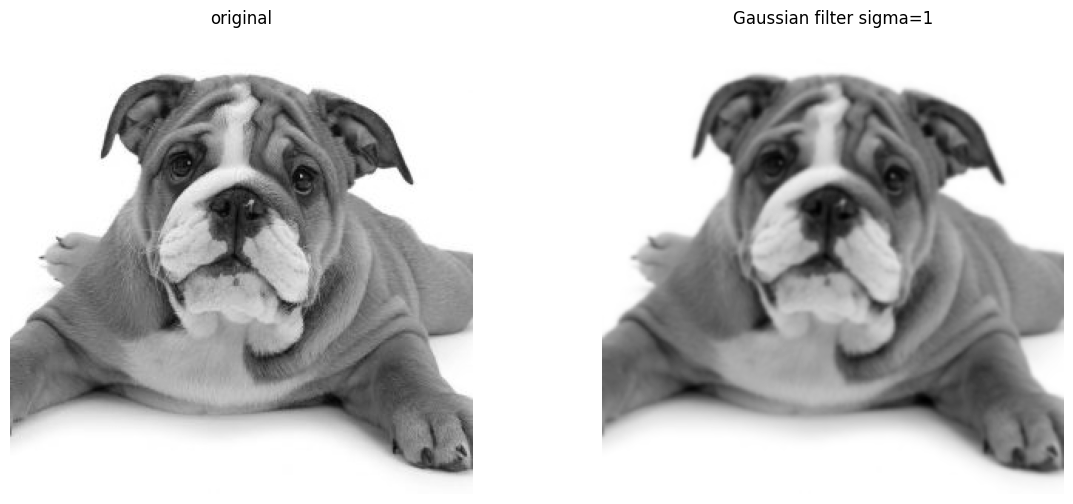

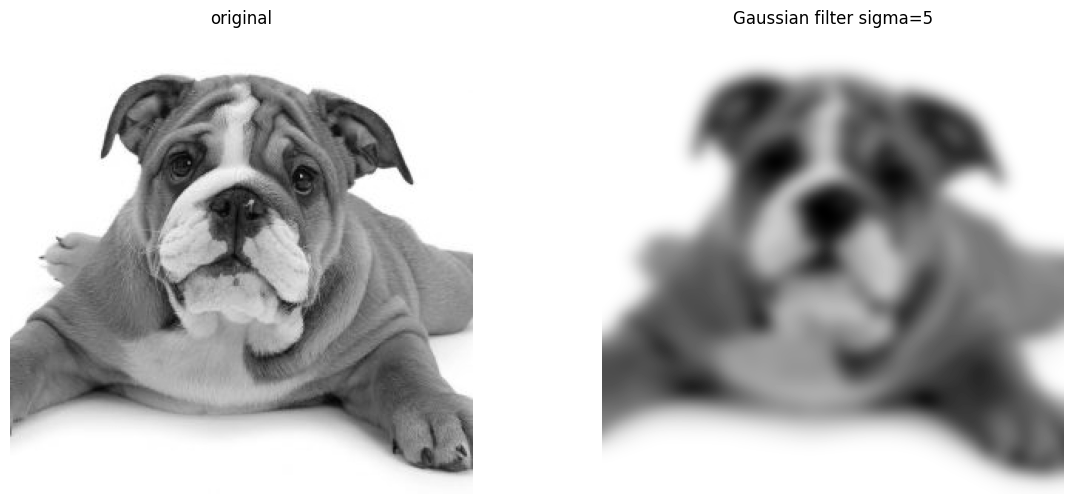

In [28]:
from skimage import data
from skimage.filters import gaussian
from skimage.color import rgb2gray

img = IG

img_f = gaussian(img, sigma=0.1)
plot_comparison(img,img_f, 'Gaussian filter sigma=0.1')
plt.savefig('gaussian.png')


img_f = gaussian(img, sigma=1)
plot_comparison(img,img_f, 'Gaussian filter sigma=1')


img_f = gaussian(img, sigma=5)
plot_comparison(img,img_f, 'Gaussian filter sigma=5')

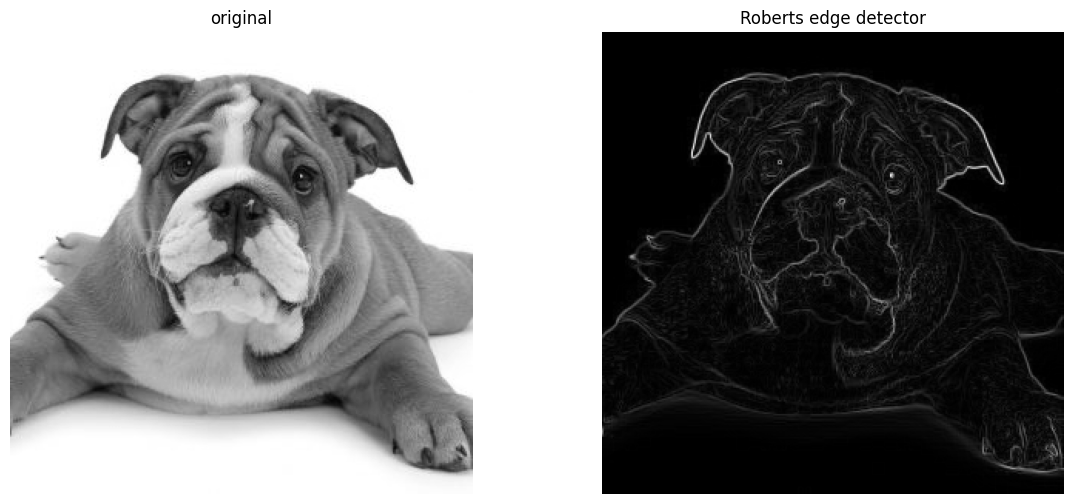

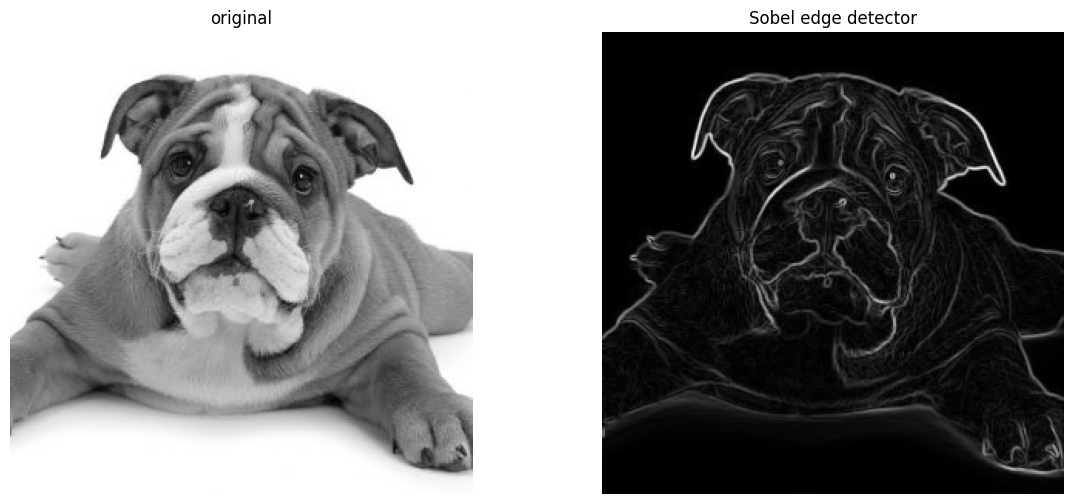

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel

image = IG

edge_roberts = roberts(image)
plot_comparison(image,edge_roberts, 'Roberts edge detector')
plt.savefig('roberts_edges.png')

edge_sobel = sobel(image)
plot_comparison(image,edge_sobel, 'Sobel edge detector')

#We could also use Canny

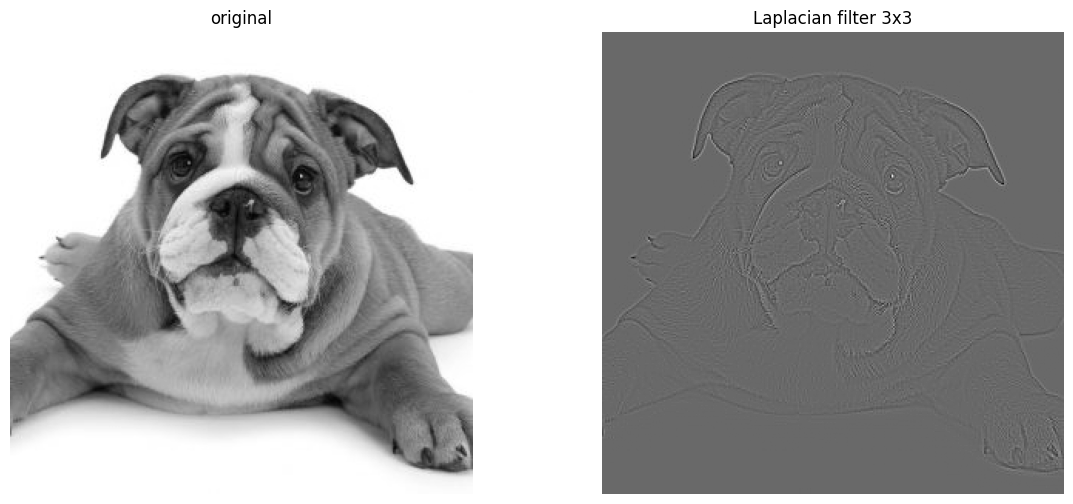

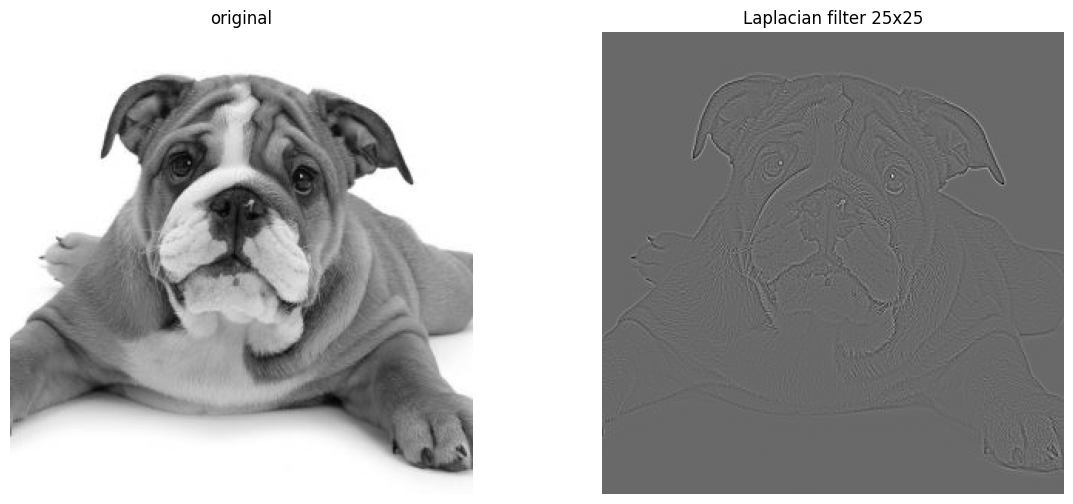

In [30]:
from skimage import data
from skimage.filters import laplace
from skimage.color import rgb2gray

img_f = laplace(image, 3) # 3 por 3 tamano de la ventana
plot_comparison(image,img_f, 'Laplacian filter 3x3')
plt.savefig('laplacian.png')

img_f = laplace(image, 25)
plot_comparison(image,img_f, 'Laplacian filter 25x25')

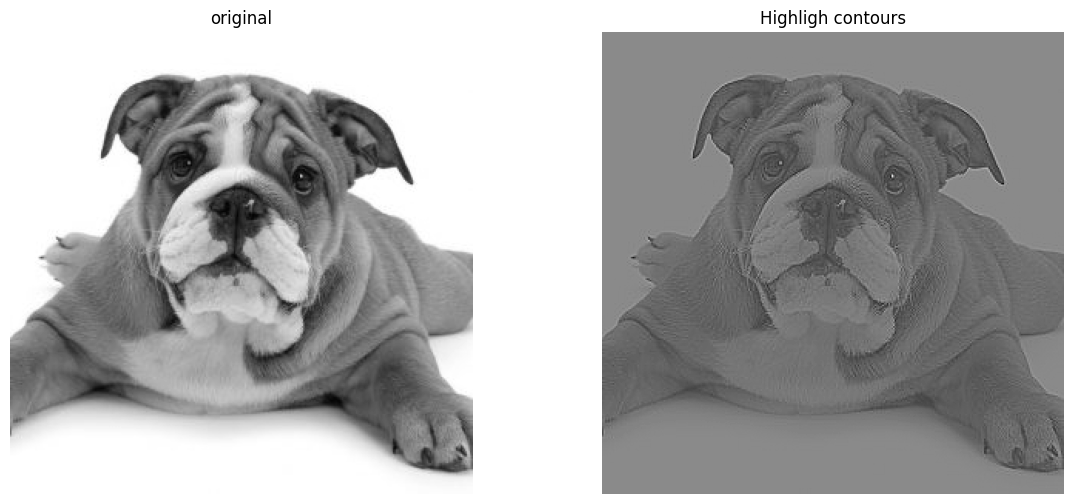

In [31]:
from skimage import data
from skimage import img_as_float,img_as_ubyte
from skimage.filters import laplace

im_enhanced = image+img_f
plot_comparison(image,im_enhanced, 'Highligh contours')

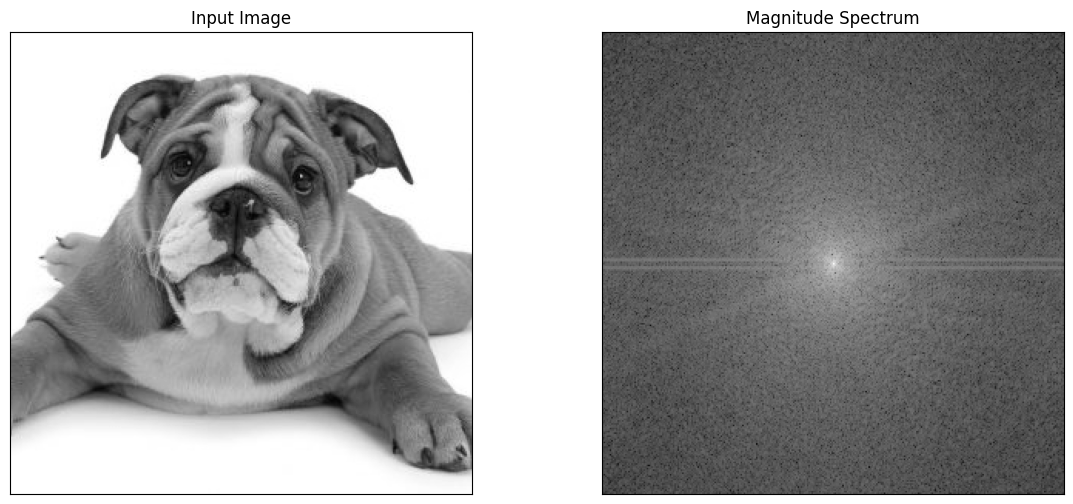

In [32]:
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from matplotlib import pyplot as plt

img = I
img = rgb2gray(img)


f = np.fft.fft2(img) # Discrete Fourier Transform using FFT algorithm
fshift = np.fft.fftshift(f) # Shift to have zero frequency (origin) at the center of the image
magnitude_spectrum = 20*np.log(np.abs(fshift)) # Logarithmic scale for better visualization of the differences in powert spectrum

fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.savefig('frequency.png')
plt.show()

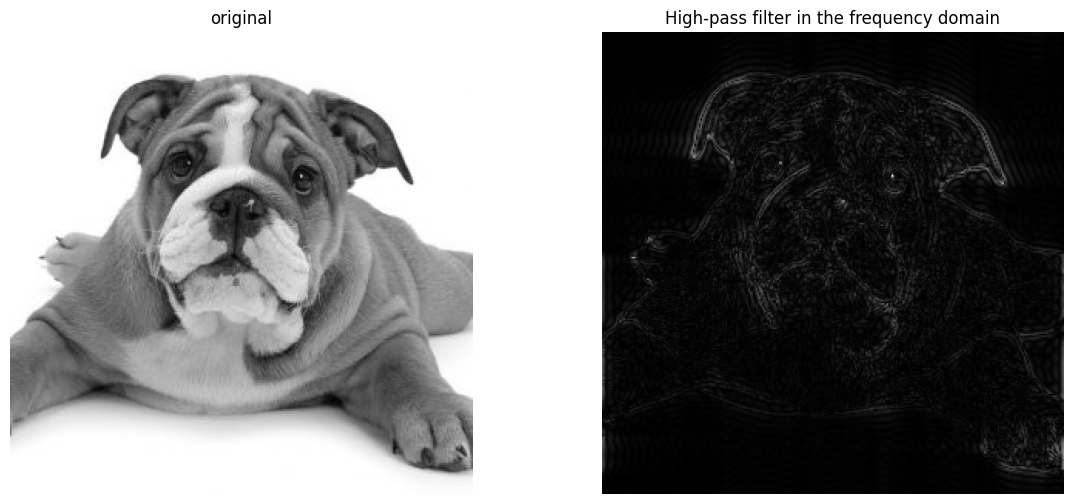

In [33]:
rows, cols = img.shape
crow, ccol = np.int64(rows/2) , np.int64(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plot_comparison(img,img_back, 'High-pass filter in the frequency domain')

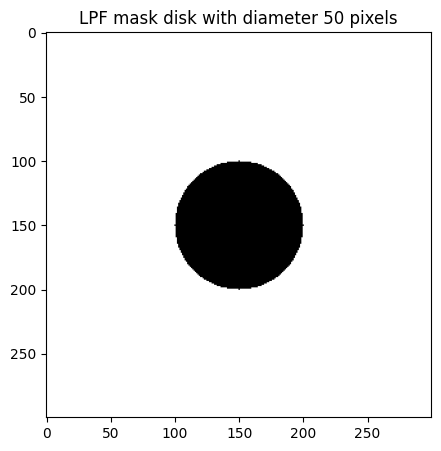

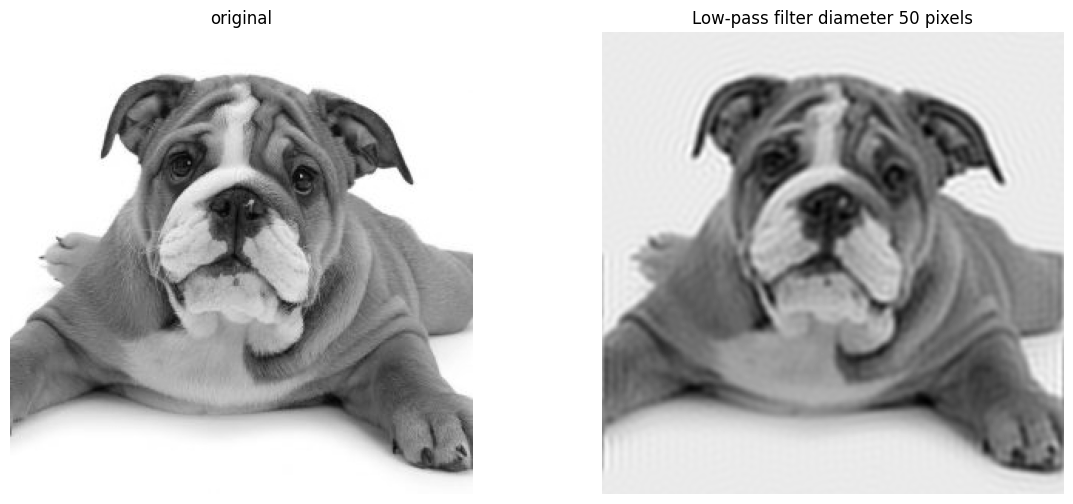

In [34]:
nrows, ncols = img.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 50
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(5,5))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('LPF mask disk with diameter {} pixels'.format(disk_diameter))
plt.show()

plot_comparison(img,img_back, 'Low-pass filter diameter {} pixels'.format(disk_diameter))

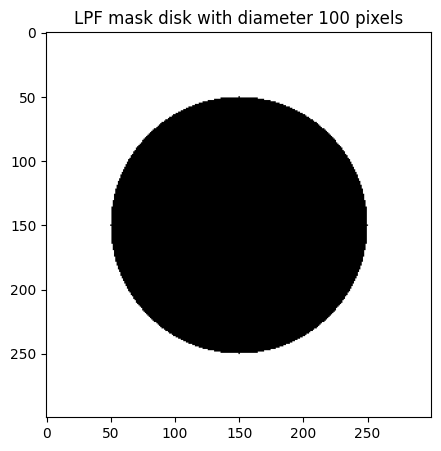

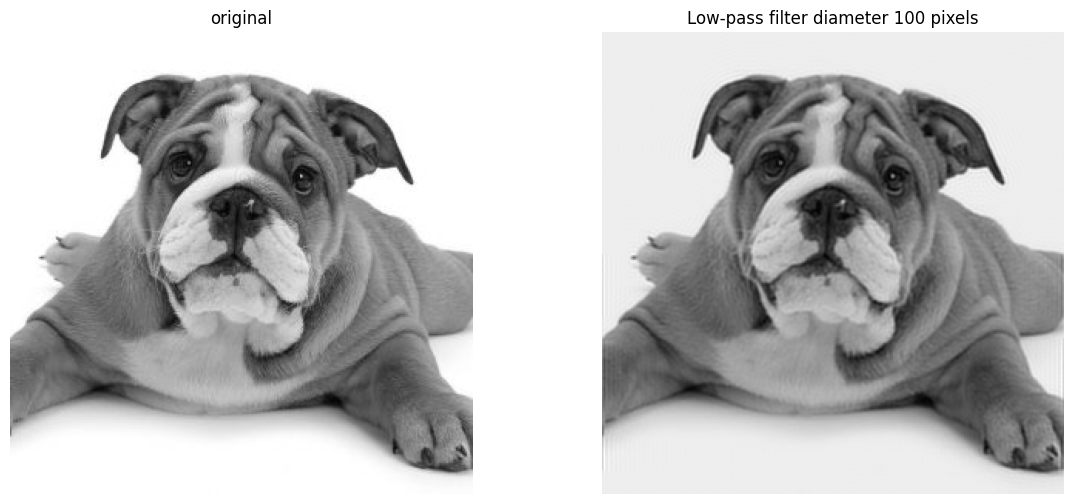

In [35]:
disk_diameter = 100
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(5,5))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('LPF mask disk with diameter {} pixels'.format(disk_diameter))
plt.show()
plot_comparison(img,img_back, 'Low-pass filter diameter {} pixels'.format(disk_diameter))

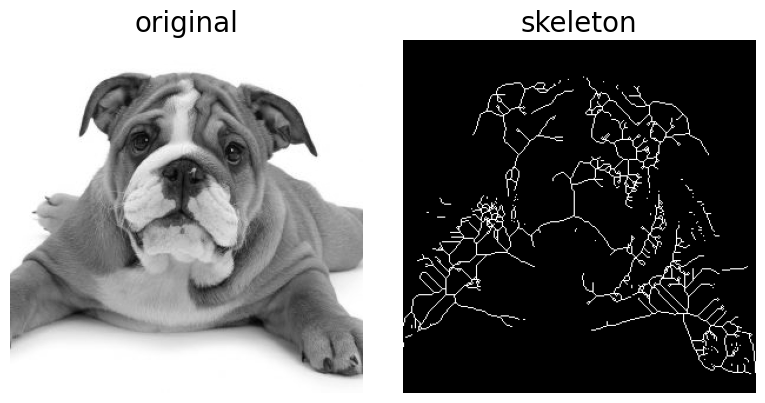

In [39]:
# prompt: Do a  Skeletonization of the dog with Zhang algorithm

from skimage.morphology import skeletonize
from skimage.util import invert


binary_image = IG > 0.5

# Invert the horse image
inverted_image = invert(binary_image)

# perform skeletonization
skeleton = skeletonize(inverted_image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()